## 1. 목표 설정
*   분석할 문제 정의
*   프로젝트의 방향성과 범위를 명확히 설정

> "주말 동안 자동차 도로 -> 보행자 도로로 전환하자"는 정책의 타당성을 평가





## 2. 데이터 수집

## 3. 데이터 준비

* 전처리, 가공
* 정제(결측치, 이상치)
* 변환(정규화, 범주형 인코딩)
* 변수 선택 및 생성

In [ ]:
import pandas as pd

walk_df = pd.read_csv('S-DoT_WALK_2024.03.25-03.31.csv', encoding='cp949')
walk_df.head()

,모델번호,시리얼,측정시간,지역,자치구,행정동,방문자수,등록일
0,SDOT001,3027,2024-03-24_23:55:00,traditional_markets,Gangbuk-gu,Mia-dong,125,2024-03-25 00:08:13
1,SDOT001,3040,2024-03-25_00:06:00,traditional_markets,Gangbuk-gu,Suyu1-dong,141,2024-03-25 00:18:00
2,SDOT001,3018,2024-03-25_00:05:00,traditional_markets,Jungnang-gu,Muk2-dong,87,2024-03-25 00:18:00
3,SDOT001,3019,2024-03-25_00:05:00,traditional_markets,Dobong-gu,Chang3-dong,165,2024-03-25 00:18:00
4,SDOT001,3022,2024-03-25_00:05:00,traditional_markets,Gwanak-gu,Sinwon-dong,127,2024-03-25 00:18:00


In [ ]:
walk_df.isnull().sum() # 결측치 확인

,0
모델번호,0
시리얼,0
측정시간,0
지역,0
자치구,0
행정동,0
방문자수,0
등록일,0


In [ ]:
walk_df.describe() # 기술통계(연속형/이산형 변수만)

,시리얼,방문자수
count,93806.000000,93806.000000
mean,3575.549410,124.033335
std,505.297044,123.840710
min,2992.000000,0.000000
25%,3019.000000,13.000000
50%,4006.000000,103.000000
75%,4034.000000,195.000000
max,4065.000000,1120.000000


In [ ]:
walk_df['측정시간'] = pd.to_datetime(walk_df['측정시간'], format='%Y-%m-%d_%H:%M:%S')
walk_df.describe(include='all')

,모델번호,시리얼,측정시간,지역,자치구,행정동,방문자수,등록일
count,93806,93806.000000,93806,93806,93806,93806,93806.000000,93806
unique,1,NaN,NaN,6,23,76,NaN,5125
top,SDOT001,NaN,NaN,traditional_markets,Seoul_Grand_Park,Amsa1-dong,NaN,2024-03-29 02:48:05
freq,93806,NaN,NaN,43255,7712,2779,NaN,87
mean,NaN,3575.549410,2024-03-28 10:47:16.459928064,NaN,NaN,NaN,124.033335,NaN
min,NaN,2992.000000,2024-03-24 23:55:00,NaN,NaN,NaN,0.000000,NaN
25%,NaN,3019.000000,2024-03-26 17:07:00,NaN,NaN,NaN,13.000000,NaN
50%,NaN,4006.000000,2024-03-28 10:32:00,NaN,NaN,NaN,103.000000,NaN
75%,NaN,4034.000000,2024-03-30 03:50:00,NaN,NaN,NaN,195.000000,NaN
max,NaN,4065.000000,2024-03-31 23:47:00,NaN,NaN,NaN,1120.000000,NaN


In [ ]:
walk_df['요일'] = walk_df['측정시간'].dt.day_name()
walk_df['요일']

,요일
0,Sunday
1,Monday
2,Monday
3,Monday
4,Monday
...,...
93801,Sunday
93802,Sunday
93803,Sunday
93804,Sunday


In [ ]:
walk_df['주말여부'] = walk_df['측정시간'].dt.dayofweek >= 5
walk_df['주말여부']

,주말여부
0,True
1,False
2,False
3,False
4,False
...,...
93801,True
93802,True
93803,True
93804,True


## 4. 데이터 탐색
* 다양한 각도에서 조사
* 데이터를 직관적으로 이해 (시각화, 기술통계)
* 인사이트

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


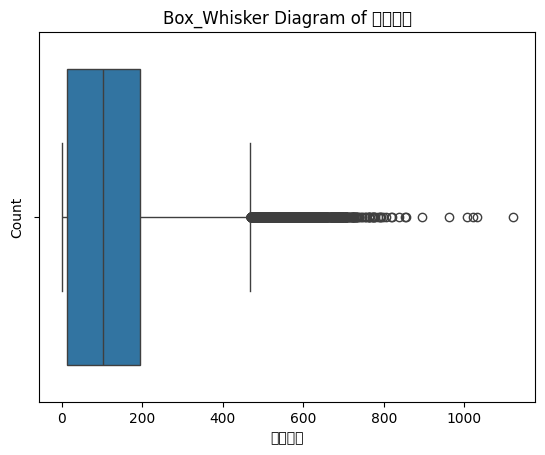

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 방문자수의 분포
sns.boxplot(data=walk_df, x='방문자수')
plt.title('Box_Whisker Diagram of 방문자수')
plt.xlabel('방문자수')
plt.ylabel('Count')
plt.show()

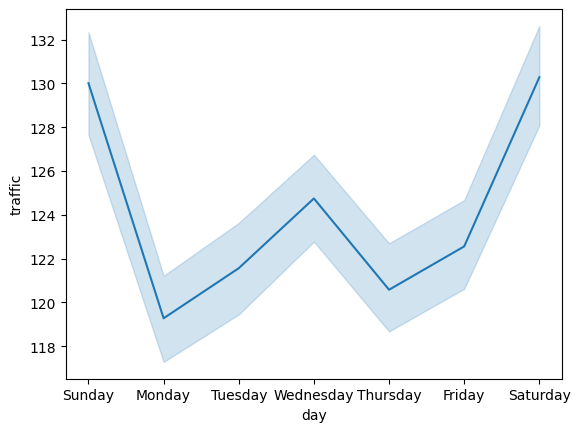

In [ ]:
sns.lineplot(data=walk_df, x='요일', y='방문자수') # 꺾은선그래프
plt.xlabel('day')
plt.ylabel('traffic')
plt.show()

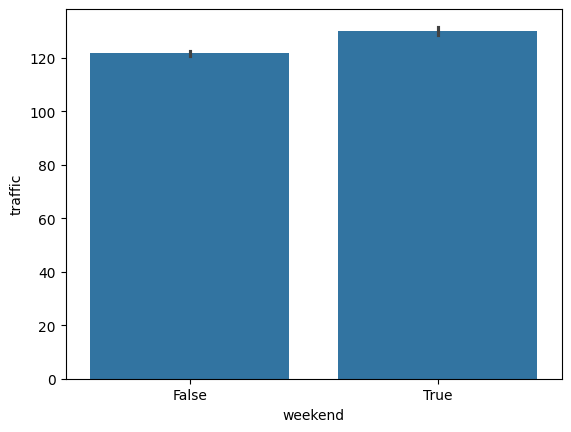

In [ ]:
sns.barplot(data=walk_df, x='주말여부', y='방문자수') # 막대그래프
plt.xlabel('weekend')
plt.ylabel('traffic')
plt.show()

In [ ]:
weekend_df = walk_df[walk_df['주말여부']]
weekday_df = walk_df[~walk_df['주말여부']]

print('주말 일별 평균 방문자수', weekend_df['방문자수'].mean())
print('주중 일별 평균 방문자수', weekday_df['방문자수'].mean())

주말 일별 평균 방문자수 130.15862312306425
주중 일별 평균 방문자수 121.7457795868168


##5. 데이터 모델링
* 모델 학습, 성능 평가
* 최적의 모델 선택

In [ ]:
# 정규성 검정(Shapiro-Wilk test): 데이터가 정규 분포를 따르는지
from scipy.stats import shapiro

weekday_visitors_normality = shapiro(weekday_df['방문자수'])
weekend_visitors_normality = shapiro(weekend_df['방문자수'])

# p값이 작기 때문에 => 정규분포X, 정규성X
print('주중 방문자수 정규성 검정', weekday_visitors_normality)
print('주말 방문자수 정규성 검정', weekend_visitors_normality)

주중 방문자수 정규성 검정 ShapiroResult(statistic=0.8769852873317948, pvalue=2.133562668797593e-109)
주말 방문자수 정규성 검정 ShapiroResult(statistic=0.8737722831849263, pvalue=1.8587334413840065e-87)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 68299.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 25507.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Welch's t-test
from scipy.stats import ttest_ind

# Ho: 주중/주말 평균 방문자수는 차이 X
# H1: 주중/주말 평균 방문자수는 차이 O

# p-value(p값): 귀무가설이 참일 때 확률. 일반적으로 0.05(5%) 이하일 때 귀무가설 기각.

t_stat, p_value = ttest_ind(weekday_df['방문자수'], weekend_df['방문자수'], equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -8.973760870888253, P-value: 2.9780960211350053e-19


## 6. 활용 및 배포
* 최종 모델을 실제 의사결정에 적용
* 지속적인 모니터링 및 업데이트
> 보행자 전용도로 전환 정책의 타당성을 평가